# Downloading ERA5 data

## Setup

See https://cds.climate.copernicus.eu/api-how-to

```
url: https://cds.climate.copernicus.eu/api/v2
key: 149083:04eaf19e-98e4-4a69-b2c8-44a62d69204e
```

In [ ]:
with open('/root/.cdsapirc', 'w') as f:
  f.write("url: https://cds.climate.copernicus.eu/api/v2\nkey: 149083:04eaf19e-98e4-4a69-b2c8-44a62d69204e")

In [ ]:
!pip install cdsapi

  Preparing metadata (setup.py) ... done
  Created wheel for cdsapi: filename=cdsapi-0.6.1-py2.py3-none-any.whl size=12008 sha256=e7449782340173c2d76e02a128a44d24b135215c16a62f79677dee49f2c8ab32
  Stored in directory: /root/.cache/pip/wheels/7c/63/08/45461d6f6636c1aba7846828d8c787a064073945048f76d44a
Successfully built cdsapi


In [ ]:
import cdsapi

c = cdsapi.Client()

### Define parameters

In [ ]:
years = [
    '1978', '1979', '1980',
    '1981', '1982', '1983',
    '1984', '1985', '1986',
    '1987', '1988', '1989',
    '1990', '1991', '1992',
    '1993', '1994', '1995',
    '1996', '1997', '1998',
    '1999', '2000', '2001',
    '2002', '2003', '2004',
    '2005', '2006', '2007',
    '2008', '2009', '2010',
    '2011', '2012', '2013',
    '2014', '2015', '2016',
    '2017', '2018', '2019',
    '2020', '2021', '2022',
    '2023',
]

months = [
    '01', '02', '03',
    '04', '05', '06',
    '07', '08', '09',
    '10', '11', '12',
]

days = [
    '01', '02', '03',
    '04', '05', '06',
    '07', '08', '09',
    '10', '11', '12',
    '13', '14', '15',
    '16', '17', '18',
    '19', '20', '21',
    '22', '23', '24',
    '25', '26', '27',
    '28', '29', '30',
    '31',
]

times = [
    '00:00', '01:00', '02:00',
    '03:00', '04:00', '05:00',
    '06:00', '07:00', '08:00',
    '09:00', '10:00', '11:00',
    '12:00', '13:00', '14:00',
    '15:00', '16:00', '17:00',
    '18:00', '19:00', '20:00',
    '21:00', '22:00', '23:00',
]

area = [
    90, -180, 16,
    180,
]

## List of variables

### Variables used by Chen et al. 2023
(possibly, based on their description; in particular, it's hard to know what pressure levels to download from)

Single levels:
```
sea_surface_temperature
total_precipitation
surface_latent_heat_flux
surface_sensible_heat_flux
10m_u_component_of_wind
10m_v_component_of_wind
surface_pressure
```

Pressure levels:

500 hPa???

```
specific_humidity
```

wind?

### Variables used by Andersson et al. 2021

Single levels:
```
2m_temperature
sea_surface_temperature
surface_net_solar_radiation
surface_solar_radiation_downwards
mean_sea_level_pressure
10m_u_component_of_wind
10m_v_component_of_wind
```

Pressure levels:

500 hPa
```
temperature
geopotential
```

250 hPa
```
geopotential
```

10 hPa
```
u_component_of_wind
```

## Hourly

In [ ]:
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': [
            '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_temperature',
            'mean_sea_level_pressure', 'sea_surface_temperature', 'surface_latent_heat_flux',
            'surface_net_solar_radiation', 'surface_pressure', 'surface_sensible_heat_flux',
            'surface_solar_radiation_downwards', 'total_precipitation',
        ],
        'year': years,
        'month': months,
        'day': days,
        'time': times,
        'area': area,
        'format': 'grib',
    },
    'era5-single-levels.grib')

In [ ]:
def retrieve_pressure_level(variable, pressure_level):
  c.retrieve(
      'reanalysis-era5-pressure-levels',
      {
          'product_type': 'reanalysis',
          'variable': variable,
          'pressure_level': pressure_level,
          'year': years,
          'month': months,
          'day': days,
          'time': times,
          'area': area,
          'format': 'grib',
      },
      f'era5-{pressure_level}hpa.grib')

In [ ]:
retrieve_pressure_level(['geopotential', 'specific_humidity', 'temperature'], '500')

In [ ]:
retrieve_pressure_level('geopotential', '250')

In [ ]:
retrieve_pressure_level('u_component_of_wind', '10')

In [ ]:
# to do: calculate daily averages
# maybe also break these up if they're too big

## Monthly

In [ ]:
c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'product_type': 'monthly_averaged_reanalysis',
        'variable': [
            '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_temperature',
            'mean_sea_level_pressure', 'sea_surface_temperature', 'surface_latent_heat_flux',
            'surface_net_solar_radiation', 'surface_pressure', 'surface_sensible_heat_flux',
            'surface_solar_radiation_downwards', 'total_precipitation',
        ],
        'year': years,
        'month': months,
        'time': '00:00',
        'area': area,
        'format': 'grib',
    },
    'era5-single-levels-monthly.grib')

2023-07-28 01:07:11,635 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-07-28 01:07:11,640 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2023-07-28 01:07:11,975 INFO Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data0/adaptor.mars.internal-1690498679.747156-30714-9-d05f01c0-e1f3-4914-a095-4c113a945fc0.grib to era5-single-levels-monthly.grib (4.6G)
INFO:cdsapi:Downloading https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data0/adaptor.mars.internal-1690498679.747156-30714-9-d05f01c0-e1f3-4914-a095-4c113a945fc0.grib to era5-single-levels-monthly.grib (4.6G)
2023-07-28 01:19:25,125 INFO Download rate 6.5M/s
INFO:cdsapi:Download rate 6.5M/s


Result(content_length=4975523280,content_type=application/x-grib,location=https://download-0004-clone.copernicus-climate.eu/cache-compute-0004/cache/data0/adaptor.mars.internal-1690498679.747156-30714-9-d05f01c0-e1f3-4914-a095-4c113a945fc0.grib)

In [ ]:
def retrieve_pressure_level_monthly(variable, pressure_level):
  c.retrieve(
      'reanalysis-era5-pressure-levels-monthly-means',
      {
          'product_type': 'monthly_averaged_reanalysis',
          'variable': variable,
          'pressure_level': pressure_level,
          'year': years,
          'month': months,
          'time': '00:00',
          'area': area,
          'format': 'grib',
      },
      f'era5-{pressure_level}hpa-monthly.grib')

In [ ]:
retrieve_pressure_level_monthly(['geopotential', 'specific_humidity', 'temperature'], '500')

2023-07-28 00:12:20,947 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-07-28 00:12:20,956 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels-monthly-means
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels-monthly-means
2023-07-28 00:12:21,131 INFO Request is queued
INFO:cdsapi:Request is queued
2023-07-28 00:12:22,304 INFO Request is running
INFO:cdsapi:Request is running
2023-07-28 00:34:48,938 INFO Request is completed
INFO:cdsapi:Request is completed
2023-07-28 00:34:48,949 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data1/adaptor.mars.internal-1690503141.3545704-31804-1-82b72b85-77a4-4037-9446-87272295692a.grib to era5-500hpa-monthly.grib (1.3G)
INFO:cdsapi:Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data1/adaptor.mars.internal-1690503141.3545704-31804-1-82b72b8

In [ ]:
retrieve_pressure_level_monthly('geopotential', '250')

2023-07-28 00:42:36,161 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-07-28 00:42:36,164 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels-monthly-means
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels-monthly-means
2023-07-28 00:42:36,338 INFO Request is queued
INFO:cdsapi:Request is queued
2023-07-28 00:42:37,503 INFO Request is running
INFO:cdsapi:Request is running
2023-07-28 00:45:29,262 INFO Request is completed
INFO:cdsapi:Request is completed
2023-07-28 00:45:29,266 INFO Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data7/adaptor.mars.internal-1690504956.5747726-12771-8-136dd33e-d0a5-4618-9382-d89b822e105a.grib to era5-250hpa-monthly.grib (445.5M)
INFO:cdsapi:Downloading https://download-0012-clone.copernicus-climate.eu/cache-compute-0012/cache/data7/adaptor.mars.internal-1690504956.5747726-12771-8-136dd

In [ ]:
retrieve_pressure_level_monthly('u_component_of_wind', '10')

2023-07-28 00:47:36,315 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-07-28 00:47:36,325 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels-monthly-means
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-pressure-levels-monthly-means
2023-07-28 00:47:36,525 INFO Request is queued
INFO:cdsapi:Request is queued
2023-07-28 00:47:37,702 INFO Request is running
INFO:cdsapi:Request is running
2023-07-28 00:50:29,479 INFO Request is completed
INFO:cdsapi:Request is completed
2023-07-28 00:50:29,483 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data2/adaptor.mars.internal-1690505256.820836-27945-11-d0e72d58-7f50-4c12-b8f0-8d7d7cfe7682.grib to era5-10hpa-monthly.grib (445.5M)
INFO:cdsapi:Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data2/adaptor.mars.internal-1690505256.820836-27945-11-d0e72d

### Put on Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp era5-single-levels-monthly.grib drive/MyDrive/Arctic\ sea\ ice\ research/Data/era5-single-levels-monthly.grib
!cp era5-500hpa-monthly.grib drive/MyDrive/Arctic\ sea\ ice\ research/Data/era5-500hpa-monthly.grib
!cp era5-250hpa-monthly.grib drive/MyDrive/Arctic\ sea\ ice\ research/Data/era5-250hpa-monthly.grib
!cp era5-10hpa-monthly.grib drive/MyDrive/Arctic\ sea\ ice\ research/Data/era5-10hpa-monthly.grib

drive.flush_and_unmount()

Mounted at /content/drive


# Small test

In [ ]:
c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'product_type': 'monthly_averaged_reanalysis',
        'variable': 'sea_surface_temperature',
        'year': '2022',
        'month': '09',
        'time': '00:00',
        'area': area,
        'format': 'grib',
    },
    'sst-test.grib')

2023-07-30 02:19:40,677 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-07-30 02:19:40,684 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2023-07-30 02:19:40,922 INFO Request is queued
INFO:cdsapi:Request is queued
2023-07-30 02:19:42,035 INFO Request is running
INFO:cdsapi:Request is running
2023-07-30 02:19:43,655 INFO Request is completed
INFO:cdsapi:Request is completed
2023-07-30 02:19:43,662 INFO Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data9/adaptor.mars.internal-1690683581.507697-6074-1-4f6aeaa5-7db1-46ce-bbb3-4c5504adc38a.grib to sst.grib (544.8K)
INFO:cdsapi:Downloading https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data9/adaptor.mars.internal-1690683581.507697-6074-1-4f6aeaa5-7db1-46ce-bbb3-4c5504adc38a.grib

Result(content_length=557880,content_type=application/x-grib,location=https://download-0018.copernicus-climate.eu/cache-compute-0018/cache/data9/adaptor.mars.internal-1690683581.507697-6074-1-4f6aeaa5-7db1-46ce-bbb3-4c5504adc38a.grib)

# Combining data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp drive/MyDrive/Arctic\ sea\ ice\ research/Data/era5-single-levels-monthly.grib era5-single-levels-monthly.grib
!cp drive/MyDrive/Arctic\ sea\ ice\ research/Data/era5-500hpa-monthly.grib era5-500hpa-monthly.grib
!cp drive/MyDrive/Arctic\ sea\ ice\ research/Data/era5-250hpa-monthly.grib era5-250hpa-monthly.grib
!cp drive/MyDrive/Arctic\ sea\ ice\ research/Data/era5-10hpa-monthly.grib era5-10hpa-monthly.grib

drive.flush_and_unmount()

Mounted at /content/drive


In [ ]:
!pip install ecmwflibs
!pip install cfgrib
!pip install zarr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 MB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for findlibs: filename=findlibs-0.0.5-py3-none-any.whl size=6944 sha256=2c9d397c3dd3fe55e189ad28527aeaac0384feb1c9e416ff1f5153cec7529219
  Stored in directory: /root/.cache/pip/wheels/2e/67/14/22fa5b9fd9c41be520b37e908597d6a262803c0fcf2ba7c2c3
Successfully built findlibs
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 922.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eccodes: filename=eccodes-1.6.0-py3-none-any.whl size=40959 sha256=37d1e3f63e259f245658771b42a0b19e53fffb52c4cb357fa9ec6e4d2d11e446
  Stored in directory: /root/.cache/pip/wheels/4e/c2/01/779f6bbee8f7aeaa40b9070ac75bf0c9d9b810776bf2790a5c
Successfully built eccodes
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (s

In [ ]:
import xarray as xr
import cfgrib
import pandas as pd

In [ ]:
pressure_500 = xr.load_dataset('era5-500hpa-monthly.grib', engine='cfgrib')
pressure_250 = xr.load_dataset('era5-250hpa-monthly.grib', engine='cfgrib')
pressure_10 = xr.load_dataset('era5-10hpa-monthly.grib', engine='cfgrib')

In [ ]:
def process_pressure_level_dataset(dataset):
  return dataset.rename({key: key + f'_{int(dataset.isobaricInhPa)}hPa' for key in dataset.data_vars.keys()}).drop('isobaricInhPa')

pressure = xr.merge(process_pressure_level_dataset(ds) for ds in (pressure_500, pressure_250, pressure_10))

In [ ]:
# for some reason this contains 2 datasets
sl0, sl1 = cfgrib.open_datasets('era5-single-levels-monthly.grib')

In [ ]:
# this one is 6 hours behind for some reason, so shift it to align it with the other data
new_sl1 = sl1.assign_coords(time=xr.apply_ufunc(lambda x: pd.to_datetime(x) + pd.DateOffset(hours=6), sl1.time)).drop(('step', 'valid_time'))

single_levels = xr.merge((sl0, new_sl1))

In [ ]:
data = xr.merge((pressure, single_levels))

In [ ]:
data

<xarray.Dataset>
Dimensions:     (time: 546, latitude: 297, longitude: 1440)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 1978-01-01 1978-02-01 ... 2023-06-01
    step        timedelta64[ns] 00:00:00
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... 16.5 16.25 16.0
  * longitude   (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
    valid_time  (time) datetime64[ns] 1978-01-01 1978-02-01 ... 2023-06-01
    surface     float64 0.0
Data variables: (12/16)
    z_500hPa    (time, latitude, longitude) float32 4.93e+04 ... 5.777e+04
    q_500hPa    (time, latitude, longitude) float32 9.24e-05 ... 0.0008766
    t_500hPa    (time, latitude, longitude) float32 229.7 229.7 ... 268.2 268.1
    z_250hPa    (time, latitude, longitude) float32 9.239e+04 ... 1.076e+05
    u_10hPa     (time, latitude, longitude) float32 -9.155e-05 ... -30.71
    sst         (time, latitude, longitude) float32 ...
    ...          ...
    t2m         (time, latitude, longitude) float32 ...
    sshf        (time, latitude, longitude) float32 ...
    slhf        (time, latitude, longitude) float32 ...
    ssrd        (time, latitude, longitude) float32 ...
    ssr         (time, latitude, longitude) float32 ...
    tp          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-07-29T21:56 GRIB to CDM+CF via cfgrib-0.9.1...

General note: if it ever says something like that the engine is unrecognized, try restarting the runtime if you're sure you installed it. (Usually, try to install things first before using them.)

In [ ]:
# chunk and save as Zarr rather than as NetCDF so that it doesn't use too much RAM
data.chunk({'time': 1}).to_zarr('era5-monthly.zarr')

In [ ]:
!du -sh era5-monthly.zarr

6.4G	era5-monthly.zarr


Trying to compress using `tar -czf` takes a long time (11 minutes), and trying to put the folder directly onto Google Drive takes longer (16 minutes), so this is the fastest way (1 minute for `tar`ing and 3 minutes for putting onto Google Drive).

In [ ]:
!tar -cf era5-monthly.zarr.tar era5-monthly.zarr

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp era5-monthly.zarr.tar drive/MyDrive/Arctic\ sea\ ice\ research/Data/era5-monthly.zarr.tar

drive.flush_and_unmount()

Mounted at /content/drive


# Loading data from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp drive/MyDrive/Arctic\ sea\ ice\ research/Data/era5-monthly.zarr.tar era5-monthly.zarr.tar

drive.flush_and_unmount()

Mounted at /content/drive


In [ ]:
!tar -xf era5-monthly.zarr.tar

In [ ]:
!pip install zarr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.5/206.5 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 63.4 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5033 sha256=d16a5813865496bea5a1a432d2262d0568c7fd90546100b54c7d426bade461ab
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree


In [ ]:
import xarray as xr

In [ ]:
data = xr.open_zarr('era5-monthly.zarr')

In [ ]:
data

<xarray.Dataset>
Dimensions:     (latitude: 297, longitude: 1440, time: 546)
Coordinates:
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... 16.5 16.25 16.0
  * longitude   (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
    number      int64 ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * time        (time) datetime64[ns] 1978-01-01 1978-02-01 ... 2023-06-01
    valid_time  (time) datetime64[ns] dask.array<chunksize=(546,), meta=np.ndarray>
Data variables: (12/16)
    msl         (time, latitude, longitude) float32 dask.array<chunksize=(1, 297, 1440), meta=np.ndarray>
    q_500hPa    (time, latitude, longitude) float32 dask.array<chunksize=(1, 297, 1440), meta=np.ndarray>
    slhf        (time, latitude, longitude) float32 dask.array<chunksize=(1, 297, 1440), meta=np.ndarray>
    sp          (time, latitude, longitude) float32 dask.array<chunksize=(1, 297, 1440), meta=np.ndarray>
    sshf        (time, latitude, longitude) float32 dask.array<chunksize=(1, 297, 1440), meta=np.ndarray>
    ssr         (time, latitude, longitude) float32 dask.array<chunksize=(1, 297, 1440), meta=np.ndarray>
    ...          ...
    tp          (time, latitude, longitude) float32 dask.array<chunksize=(1, 297, 1440), meta=np.ndarray>
    u10         (time, latitude, longitude) float32 dask.array<chunksize=(1, 297, 1440), meta=np.ndarray>
    u_10hPa     (time, latitude, longitude) float32 dask.array<chunksize=(1, 297, 1440), meta=np.ndarray>
    v10         (time, latitude, longitude) float32 dask.array<chunksize=(1, 297, 1440), meta=np.ndarray>
    z_250hPa    (time, latitude, longitude) float32 dask.array<chunksize=(1, 297, 1440), meta=np.ndarray>
    z_500hPa    (time, latitude, longitude) float32 dask.array<chunksize=(1, 297, 1440), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            1
    GRIB_subCentre:          0
    history:                 2023-07-29T21:56 GRIB to CDM+CF via cfgrib-0.9.1...
    institution:             European Centre for Medium-Range Weather Forecasts

# DWT code

This section should be the same as in the Colab notebook for sea ice concentration.

In [ ]:
import numpy as np

In [ ]:
# Filter bank for the 3-band 2-regular wavelet
wv32 = (
  ( 0.33838609728386,  0.53083618701374,  0.72328627674361,  0.23896417190576,  0.04651408217589, -0.14593600755399),
  (-0.11737701613483,  0.54433105395181, -0.01870574735313, -0.69911956479289, -0.13608276348796,  0.42695403781698),
  ( 0.40363686892892, -0.62853936105471,  0.46060475252131, -0.40363686892892, -0.07856742013185,  0.24650202866523)
)

# Filter bank for the 4-band 2-regular wavelet
wv42 = (
  (-0.067371764,  0.094195111,  0.40580489 ,  0.567371764,  0.567371764,  0.40580489 ,  0.094195111, -0.067371764),
  (-0.094195111,  0.067371764,  0.567371764,  0.40580489,  -0.40580489 , -0.567371764, -0.067371764,  0.094195111),
  (-0.094195111, -0.067371764,  0.567371764, -0.40580489,  -0.40580489 , -0.567371764, -0.067371764, -0.094195111),
  (-0.067371764, -0.094195111,  0.40580489 , -0.567371764,  0.567371764, -0.40580489 ,  0.094195111,  0.067371764)
)

# Filter bank for the 4-band 4-regular wavelet
wv44 = (
  ( 0.0857130200,  0.1931394393,  0.3491805097,  0.5616494215,  0.4955029828,  0.4145647737,  0.2190308939, -0.1145361261,
   -0.0952930728, -0.1306948909, -0.0827496793,  0.0719795354,  0.0140770701,  0.0229906779,  0.0145382757, -0.0190928308),
  (-0.1045086525,  0.1183282069, -0.1011065044, -0.0115563891,  0.6005913823, -0.2550401616, -0.4264277361, -0.0827398180,
    0.0722022649,  0.2684936992,  0.1691549718, -0.4437039320,  0.0849964877,  0.1388163056,  0.0877812188, -0.1152813433),
  ( 0.2560950163, -0.2048089157, -0.2503433230, -0.2484277272,  0.4477496752,  0.0010274000, -0.0621881917,  0.5562313118,
   -0.2245618041, -0.3300536827, -0.2088643503,  0.2202951830,  0.0207171125,  0.0338351983,  0.0213958651, -0.0280987676),
  ( 0.1839986022, -0.6622893130,  0.6880085746, -0.1379502447,  0.0446493766, -0.0823301969, -0.0923899104, -0.0233349758,
    0.0290655661,  0.0702950474,  0.0443561794, -0.0918374833,  0.0128845052,  0.0210429802,  0.0133066389, -0.0174753464)
)

In [ ]:
# to do: maybe use numpy more, e.g. np.shape() for the number of bands and filter bank length
def dwt_matrix(filter_banks, rows_per_filter_bank):
  # assertions that may or may not be needed
  num_bands = len(filter_banks)
  assert num_bands > 0
  filter_bank_length = len(filter_banks[0])
  assert all(len(filter_bank) == filter_bank_length for filter_bank in filter_banks)
  assert filter_bank_length % num_bands == 0 # this is true because an M-band L-regular DWT matrix has M filters with length ML
  # Mk x Mk matrix
  matrix_size = num_bands * rows_per_filter_bank
  assert matrix_size >= filter_bank_length

  shift = num_bands
  res = np.zeros((matrix_size, matrix_size))
  row = 0
  for filter_bank in filter_banks:
    current_offset = 0
    for _ in range(rows_per_filter_bank):
      for (i, value) in enumerate(filter_bank):
        res[row][(current_offset + i) % matrix_size] = value
      current_offset += shift
      row += 1
  return res

def dwt_1d(wavelet, signal):
  num_bands = len(wavelet)
  assert len(signal) % num_bands == 0
  k = len(signal) // num_bands
  matrix = dwt_matrix(wavelet, k)
  values = np.matmul(matrix, signal)
  return np.split(values, num_bands)

def idwt_1d(wavelet, components):
  signal = np.concatenate(components)
  num_bands = len(wavelet)
  assert len(signal) % num_bands == 0
  k = len(signal) // num_bands
  matrix = dwt_matrix(wavelet, k)
  values = np.matmul(np.transpose(matrix), signal)
  return values

# works for non-square images
def dwt_2d(wavelet, signal):
  num_bands = len(wavelet)
  assert len(signal) % num_bands == 0
  x, y = np.shape(signal)
  assert x % num_bands == 0
  assert y % num_bands == 0
  k1 = x // num_bands
  k2 = y // num_bands
  matrix1 = dwt_matrix(wavelet, k1)
  matrix2 = dwt_matrix(wavelet, k2)
  values = np.matmul(matrix1, np.matmul(signal, np.transpose(matrix2)))
  return np.array(tuple(np.split(row, num_bands) for row in np.split(values, num_bands, 1)))

In [ ]:
def clip_to_size(array, new_x, new_y):
  assert len(array.shape) == 2
  x_size, y_size = array.shape
  assert new_x <= x_size
  assert new_y <= y_size
  min_x = (x_size - new_x) // 2
  min_y = (y_size - new_y) // 2
  return array[min_x : min_x+new_x, min_y : min_y+new_y]

# clip an array to a rectangle with dimensions divisible by the amount of bands, so that the 2D DWT can be performed on it
def clip(array, num_bands):
  assert len(array.shape) == 2
  x, y = array.shape
  new_x = (x // num_bands) * num_bands
  new_y = (y // num_bands) * num_bands
  return clip_to_size(array, new_x, new_y)

# clip a certain amount from each edge of the array
# specific to the output of dwt_2d
def clip_by_amount(array, clip_amt):
  assert len(array.shape) == 4
  _, _, x_size, y_size = array.shape
  return array[:, :, clip_amt : x_size-clip_amt, clip_amt : y_size-clip_amt]

# maybe allow not reclipping on some dimensions after the DWT when it naturally wraps around, e.g. longitude
def clip_and_dwt(wavelet, signal):
  num_bands, filter_bank_length = np.shape(wavelet)
  clipped = clip(signal, num_bands)
  dwted = dwt_2d(wavelet, clipped)
  # remove artifacts at the edge due to wrapping
  # I'm not completely sure that this is the exact amount of the image that is affected by the wrapping
  clipped_2 = clip_by_amount(dwted, filter_bank_length - num_bands)
  return clipped_2

In [ ]:
# given a 4D array as the output of dwt_2d, concatenate those images to get a 2D array
def full_decomp(dwted):
  return np.concatenate(np.concatenate(dwted, 1), 1) # what does this do and why is it right?

In [ ]:
import pywt

In [ ]:
wavelets_and_names = []

wavelets_and_names.append((((1,),), 'none')) # wavelet that does nothing

for i in range(1, 6):
  dbi = pywt.Wavelet(f"db{i}").filter_bank[2:4]
  wavelets_and_names.append((dbi, f'db{i}'))

wavelets_and_names.append((wv32, 'wv32'))
wavelets_and_names.append((wv42, 'wv42'))
wavelets_and_names.append((wv44, 'wv44'))

# Preprocessing images using DWT

To do: see if any datasets have no data and don't run DWT on those

Use `data.isnull().any()` to check if there are missing values

Or solve the missing data problem another way

To do: make things float32 instead of float64 to save space and time

In [ ]:
import os
import xarray as xr

In [ ]:
%%time

os.mkdir('era5-dwted')

for wavelet, name in wavelets_and_names:
  dwted = xr.apply_ufunc((lambda x: clip_and_dwt(wavelet, x)), data, exclude_dims=set(('latitude', 'longitude')), input_core_dims=(('latitude', 'longitude'),), output_core_dims=(('wlat', 'wlon', 'lat', 'lon'),), vectorize=True)
  dwted.to_netcdf(f'era5-dwted/{name}.nc')

In [ ]:
%%time

!tar -czf era5-dwted.tar.gz era5-dwted

In [ ]:
!du -h era5-dwted.tar.gz

17G	era5-dwted.tar.gz


In [ ]:
!du -h era5-dwted

26G	era5-dwted


Save results to Google Drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp era5-dwted.tar.gz drive/MyDrive/Arctic\ sea\ ice\ research/Data/era5-dwted.tar.gz

In [ ]:
drive.flush_and_unmount()

# Plotting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cp drive/MyDrive/Arctic\ sea\ ice\ research/Data/era5-dwted.tar.gz era5-dwted.tar.gz

In [ ]:
drive.flush_and_unmount()

In [ ]:
!gzip -d era5-dwted.tar.gz

In [ ]:
import xarray as xr

In [ ]:
waveleted = xr.load_dataset('era5-dwted/db2.nc')

In [ ]:
%%time
waveleted = dwt_results(wavelets_and_names[2][0]) # db2

CPU times: user 2min 57s, sys: 50.4 s, total: 3min 47s
Wall time: 2min 18s


In [ ]:
waveleted

<xarray.Dataset>
Dimensions:        (time: 389, wlat: 2, wlon: 2, lat: 43, lon: 716)
Coordinates:
  * time           (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-05-01
    valid_time     (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-05-01
    number         int32 0
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  float64 500.0
    surface        float64 0.0
Dimensions without coordinates: wlat, wlon, lat, lon
Data variables:
    q              (time, wlat, wlon, lat, lon) float64 0.0002414 ... 3.56e-07
    u              (time, wlat, wlon, lat, lon) float64 11.2 11.06 ... -0.00301
    v              (time, wlat, wlon, lat, lon) float64 -14.89 ... 0.0005443
    sst            (time, wlat, wlon, lat, lon) float64 nan nan nan ... nan nan
    sp             (time, wlat, wlon, lat, lon) float64 2.025e+05 ... -123.3
    u10            (time, wlat, wlon, lat, lon) float64 6.915 6.886 ... -0.03951
    v10            (time, wlat, wlon, lat, lon) float64 -1.233 ... 0.01129
    sshf           (time, wlat, wlon, lat, lon) float64 -2.123e+05 ... -2.776...
    slhf           (time, wlat, wlon, lat, lon) float64 -5.093e+05 ... -1.957...
    tp             (time, wlat, wlon, lat, lon) float64 0.001215 ... 2.271e-06

In [ ]:
waveleted['sst']

<xarray.DataArray 'sst' (time: 389, wlat: 3, wlon: 3, lat: 25, lon: 25)>
array([[[[[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
...
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          ...,
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]]]])
Coordinates:
  * time           (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-05-01
    valid_time     (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-05-01
    number         int32 0
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  float64 500.0
    surface        float64 0.0
Dimensions without coordinates: wlat, wlon, lat, lon

In [ ]:
ds['sst']

<xarray.DataArray 'sst' (time: 389, latitude: 95, longitude: 1440)>
array([[[271.45996, 271.45996, 271.45996, ..., 271.45996, 271.45996,
         271.45996],
        [271.45996, 271.45996, 271.45996, ..., 271.45996, 271.45996,
         271.45996],
        [271.45996, 271.45996, 271.45996, ..., 271.45996, 271.45996,
         271.45996],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[271.45972, 271.45972, 271.45972, ..., 271.45972, 271.45972,
         271.45972],
        [271.45972, 271.45972, 271.45972, ..., 271.45972, 271.45972,
         271.45972],
        [271.45972, 271.45972, 271.45972, ..., 271.45972, 271.45972,
         271.45972],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[271.45996, 271.45996, 271.45996, ..., 271.45996, 271.45996,
         271.45996],
        [271.45996, 271.45996, 271.45996, ..., 271.45996, 271.45996,
         271.45996],
        [271.45996, 271.45996, 271.45996, ..., 271.45996, 271.45996,
         271.45996],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
    number         int64 0
  * time           (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-05-01
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  float64 500.0
  * latitude       (latitude) float64 90.0 89.75 89.5 89.25 ... 67.0 66.75 66.5
  * longitude      (longitude) float64 -180.0 -179.8 -179.5 ... 179.5 179.8
    valid_time     (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-05-01
    surface        float64 0.0
Attributes: (12/29)
    GRIB_paramId:                             34
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      136800
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    ...                                       ...
    GRIB_name:                                Sea surface temperature
    GRIB_shortName:                           sst
    GRIB_units:                               K
    long_name:                                Sea surface temperature
    units:                                    K
    standard_name:                            unknown

In [ ]:
ds

<xarray.Dataset>
Dimensions:        (time: 389, latitude: 95, longitude: 1440)
Coordinates:
    number         int64 0
  * time           (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-05-01
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  float64 500.0
  * latitude       (latitude) float64 90.0 89.75 89.5 89.25 ... 67.0 66.75 66.5
  * longitude      (longitude) float64 -180.0 -179.8 -179.5 ... 179.5 179.8
    valid_time     (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-05-01
    surface        float64 0.0
Data variables:
    q              (time, latitude, longitude) float32 0.0001189 ... 0.0004426
    u              (time, latitude, longitude) float32 0.000288 ... 6.014
    v              (time, latitude, longitude) float32 7.629e-05 ... -2.949
    u10            (time, latitude, longitude) float32 -0.02681 ... 0.2526
    v10            (time, latitude, longitude) float32 0.1467 0.1467 ... -0.6261
    sst            (time, latitude, longitude) float32 271.5 271.5 ... nan nan
    sp             (time, latitude, longitude) float32 1.011e+05 ... 9.482e+04
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-07-15T20:13 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
import pandas as pd

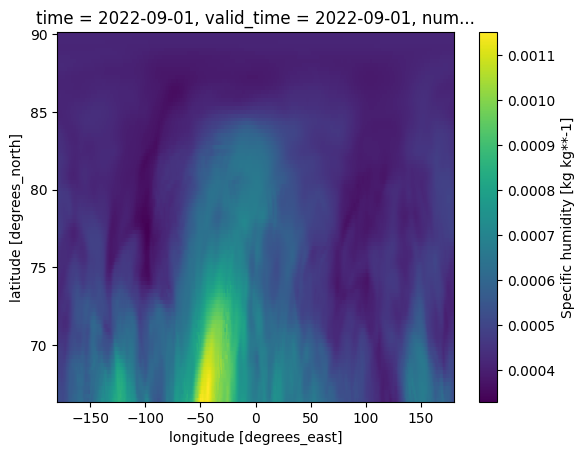

In [ ]:
data['q'].sel(time=pd.to_datetime('2022-09-01')).plot()

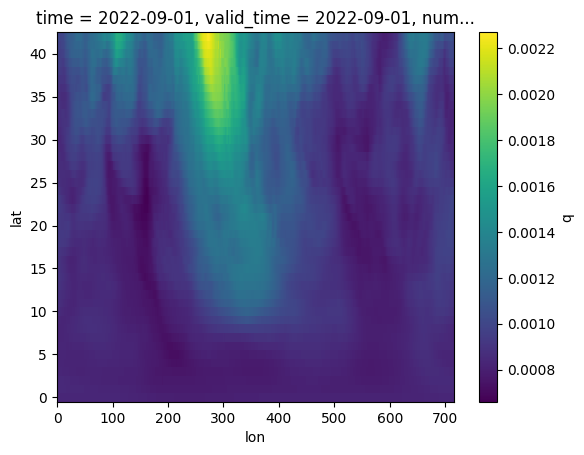

In [ ]:
waveleted['q'].sel(time=pd.to_datetime('2022-09-01')).sel(wlat=0).sel(wlon=0).plot()

# Misc. testing

In [ ]:
tuple(variable.attrs['long_name'] for variable in data.data_vars.values())

('Specific humidity',
 'U component of wind',
 'V component of wind',
 'Sea surface temperature',
 'Surface pressure',
 '10 metre U wind component',
 '10 metre V wind component',
 'Surface sensible heat flux',
 'Surface latent heat flux',
 'Total precipitation')

In [ ]:
data1

<xarray.Dataset>
Dimensions:        (time: 389, latitude: 95, longitude: 1440)
Coordinates:
    number         int64 0
  * time           (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-05-01
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  float64 500.0
  * latitude       (latitude) float64 90.0 89.75 89.5 89.25 ... 67.0 66.75 66.5
  * longitude      (longitude) float64 -180.0 -179.8 -179.5 ... 179.5 179.8
    valid_time     (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-05-01
Data variables:
    q              (time, latitude, longitude) float32 0.0001189 ... 0.0004426
    u              (time, latitude, longitude) float32 0.000288 ... 6.014
    v              (time, latitude, longitude) float32 7.629e-05 ... -2.949
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-07-25T23:03 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
data20

<xarray.Dataset>
Dimensions:     (time: 389, latitude: 95, longitude: 1440)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-05-01
    step        timedelta64[ns] 00:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... 67.0 66.75 66.5
  * longitude   (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
    valid_time  (time) datetime64[ns] 1991-01-01 1991-02-01 ... 2023-05-01
Data variables:
    sst         (time, latitude, longitude) float32 ...
    sp          (time, latitude, longitude) float32 ...
    u10         (time, latitude, longitude) float32 ...
    v10         (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

In [ ]:
data21

<xarray.Dataset>
Dimensions:     (time: 389, latitude: 95, longitude: 1440)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 1990-12-31T18:00:00 ... 2023-04-30T18:0...
    step        timedelta64[ns] 12:00:00
    surface     float64 0.0
  * latitude    (latitude) float64 90.0 89.75 89.5 89.25 ... 67.0 66.75 66.5
  * longitude   (longitude) float64 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
    valid_time  (time) datetime64[ns] 1991-01-01T06:00:00 ... 2023-05-01T06:0...
Data variables:
    sshf        (time, latitude, longitude) float32 ...
    slhf        (time, latitude, longitude) float32 ...
    tp          (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

In [ ]:
data1['q'].long_name

'Specific humidity'

# Loading data from `ERA5.nc.gz` from Google Drive (old; ignore)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gzip -dkc drive/MyDrive/Arctic\ sea\ ice\ research/Data/ERA5.nc.gz > ERA5.nc

In [ ]:
drive.flush_and_unmount()

In [ ]:
import xarray as xr

In [ ]:
data = xr.load_dataset('ERA5.nc')

(It's faster to decompress the file and then load the decompressed file than to try to load the `.gz` directly.)